## Universidad del Valle de Guatemala

### Integrantes
Juan Manuel Marroquin Alfaro 19845 <br>
Carlos Alberto Raxtúm Ramos 19721 <br>
Jose Abraham Gutierrez Corado 19111 <br>
Walter Danilo Saldaña Salguero 19897 <br>
Javier Alejandro Cotto Argueta 19324 <br>

# Proyecto #1
Sección 20<br>
23/05/2022

In [67]:
import os
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.stats import norm
import seaborn as sns
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
from kmodes import kmodes
#import pyclustertend 
import random
#from yellowbrick.cluster import SilhouetteVisualizer
#from yellowbrick.datasets import load_nfl
import scipy.stats as stats
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
#%matplotlib inline

In [68]:
pd.set_option("display.max_columns", None)

In [69]:
#load dataset
matrimonios = pd.read_csv('./Archivos/matrimonios.csv',low_memory=False)

In [70]:
#convertir los datos de strings a enteros
matrimonios['edadhom'] = pd.to_numeric(matrimonios['edadhom'],errors='coerce', downcast="integer")
matrimonios['edadmuj'] = pd.to_numeric(matrimonios['edadmuj'],errors='coerce', downcast="integer")
matrimonios['anoreg'] = pd.to_numeric(matrimonios['anoreg'],errors='coerce', downcast="integer")
matrimonios['nunuho'] = pd.to_numeric(matrimonios['nunuho'],errors='coerce', downcast="integer")
matrimonios['nunumu'] = pd.to_numeric(matrimonios['nunumu'],errors='coerce', downcast="integer")

In [71]:
#quedarse con un valor de mestizo y ladino
matrimonios["puehom"]=matrimonios.puehom.str.split('/').str[0]
matrimonios["puemuj"]=matrimonios.puemuj.str.split('/').str[0]

In [72]:
#crear columna con diferencia de edad
matrimonios['edad_dif'] = abs(matrimonios['edadhom'] - matrimonios['edadmuj'])

In [73]:
matrimonios.head()

,depreg,mupreg,mesreg,anoreg,clauni,edadhom,edadmuj,puehom,puemuj,nachom,nacmuj,ciuohom,ciuomuj,nunuho,nunumu,depocu,mupocu,mesocu,anoocu,areagocu,eschom,escmuj,diaocu,edad_dif
0,San Marcos,Comitancillo,Abril,2010,Matrimonio,16.0,14.0,Indigena,Indigena,Guatemala,Guatemala,Ignorado,Ignorado,NaN,NaN,San Marcos,Comitancillo,Septiembre,2009.0,Ignorado,NaN,NaN,NaN,2.0
1,Retalhuleu,Retalhuleu,Mayo,2009,Matrimonio,16.0,14.0,Ignorado,Ignorado,Guatemala,Guatemala,Agricultores y trabajadores calificados de cul...,Oficios domésticos no remunerados,NaN,NaN,Retalhuleu,Retalhuleu,Marzo,2009.0,Ignorado,NaN,NaN,NaN,2.0
2,Huehuetenango,Chiantla,Enero,2010,Matrimonio,16.0,14.0,Ignorado,Ignorado,Guatemala,Guatemala,Agricultores y trabajadores calificados de cul...,Oficios domésticos no remunerados,1.0,1.0,Huehuetenango,Chiantla,Diciembre,2009.0,Ignorado,NaN,NaN,NaN,2.0
3,Quiche,Joyabaj,Agosto,2009,Matrimonio,16.0,14.0,Indigena,Indigena,Guatemala,Guatemala,Agricultores y trabajadores calificados de cul...,Oficios domésticos no remunerados,1.0,1.0,Quiche,Joyabaj,Julio,2009.0,Ignorado,NaN,NaN,NaN,2.0
4,Quiche,Joyabaj,Octubre,2009,Matrimonio,16.0,14.0,Indigena,Indigena,Guatemala,Guatemala,Agricultores y trabajadores calificados de cul...,Oficios domésticos no remunerados,1.0,1.0,Quiche,Joyabaj,Octubre,2009.0,Ignorado,NaN,NaN,NaN,2.0


In [74]:
#anoreg,diaocu
cuantitativas_mat = ['anoreg', 'edadhom', 'edadmuj', 'anoocu', 'edad_dif']

In [75]:
#function that get outliers from multiple columns
#return a list of index of outliers
def get_outlier(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    low_bound = Q1 - 1.5 * IQR
    up_bound = Q3 + 1.5 * IQR
    
    outlier_list = df.index[(df[col] < low_bound) | (df[col] > up_bound)]
    
    return outlier_list

In [76]:
#function that remove the outliers based on the list
#return a cleaned data frame

def remove_outliers(df,outliers_list):
    outliers_list = sorted(set(outliers_list))
    df = df.drop(outliers_list)
    
    return df

In [77]:
# create a empty list to recolet the index
# for inside columns list to get the index
index_list = []
for col in matrimonios[cuantitativas_mat]:
    index_list.extend(get_outlier(matrimonios,col))

In [78]:
#clean the df
matrimonios = remove_outliers(matrimonios,index_list)

In [79]:
def normalizer(column):
    return (column - column.mean())/(column.std())

for col in matrimonios[cuantitativas_mat]:
    matrimonios[col] = normalizer(matrimonios[col])

In [80]:
matrimonios

,depreg,mupreg,mesreg,anoreg,clauni,edadhom,edadmuj,puehom,puemuj,nachom,nacmuj,ciuohom,ciuomuj,nunuho,nunumu,depocu,mupocu,mesocu,anoocu,areagocu,eschom,escmuj,diaocu,edad_dif
0,San Marcos,Comitancillo,Abril,-2.075062,Matrimonio,-1.579261,-1.554277,Indigena,Indigena,Guatemala,Guatemala,Ignorado,Ignorado,NaN,NaN,San Marcos,Comitancillo,Septiembre,-2.198689,Ignorado,NaN,NaN,NaN,-0.565550
2,Huehuetenango,Chiantla,Enero,-2.075062,Matrimonio,-1.579261,-1.554277,Ignorado,Ignorado,Guatemala,Guatemala,Agricultores y trabajadores calificados de cul...,Oficios domésticos no remunerados,1.0,1.0,Huehuetenango,Chiantla,Diciembre,-2.198689,Ignorado,NaN,NaN,NaN,-0.565550
15,Jalapa,Jalapa,Enero,-2.075062,Matrimonio,-1.579261,-1.554277,Ignorado,Ignorado,Guatemala,Guatemala,Agricultores y trabajadores calificados de cul...,Oficios domésticos no remunerados,NaN,NaN,Jalapa,Jalapa,Diciembre,-2.198689,Ignorado,NaN,NaN,NaN,-0.565550
37,Huehuetenango,Huehuetenango,Enero,-2.075062,Matrimonio,-1.579261,-1.554277,Ignorado,Ignorado,Guatemala,Guatemala,Agricultores y trabajadores calificados de cul...,Oficios domésticos no remunerados,NaN,NaN,Huehuetenango,Huehuetenango,Diciembre,-2.198689,Ignorado,NaN,NaN,NaN,-0.565550
38,Retalhuleu,Retalhuleu,Enero,-2.075062,Matrimonio,-1.579261,-1.554277,Ignorado,Ignorado,Guatemala,Guatemala,Estudiante,Estudiante,NaN,NaN,Retalhuleu,Retalhuleu,Octubre,-2.198689,Ignorado,NaN,NaN,NaN,-0.565550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850390,Huehuetenango,Petatán,Abril,1.311829,Comunidad de gananciales,1.014485,0.424674,Maya,Maya,Guatemala,Guatemala,Profesionales de la enseñanza,No especificado en otro grupo,1.0,1.0,Huehuetenango,Petatán,Noviembre,0.634927,Rural,Diversificado,Primaria,5.0,0.774990
850391,Huehuetenango,Petatán,Marzo,1.311829,Comunidad de gananciales,-0.444497,1.249237,Maya,Maya,Guatemala,Guatemala,Agricultores y trabajadores calificados de exp...,No especificado en otro grupo,1.0,1.0,Huehuetenango,Petatán,Noviembre,0.634927,Rural,Ignorado,Ninguno,5.0,1.445261
850392,Huehuetenango,Petatán,Abril,1.311829,Comunidad de gananciales,0.203939,1.249237,Maya,Maya,Guatemala,Guatemala,Agricultores y trabajadores calificados de exp...,No especificado en otro grupo,1.0,1.0,Huehuetenango,Petatán,Noviembre,0.634927,Rural,Ignorado,Primaria,16.0,0.104720
850393,Huehuetenango,Petatán,Abril,1.311829,Comunidad de gananciales,1.338703,1.743974,Maya,Maya,Guatemala,Guatemala,Agricultores y trabajadores calificados de exp...,No especificado en otro grupo,1.0,1.0,Huehuetenango,Petatán,Noviembre,0.634927,Rural,Ninguno,Ninguno,5.0,-1.235820


In [81]:
matrimonios = matrimonios.dropna(subset=['nunuho', 'nunumu'])
matrimonios = matrimonios.fillna("0")
matrimonios

,depreg,mupreg,mesreg,anoreg,clauni,edadhom,edadmuj,puehom,puemuj,nachom,nacmuj,ciuohom,ciuomuj,nunuho,nunumu,depocu,mupocu,mesocu,anoocu,areagocu,eschom,escmuj,diaocu,edad_dif
2,Huehuetenango,Chiantla,Enero,-2.075062,Matrimonio,-1.579261,-1.554277,Ignorado,Ignorado,Guatemala,Guatemala,Agricultores y trabajadores calificados de cul...,Oficios domésticos no remunerados,1.0,1.0,Huehuetenango,Chiantla,Diciembre,-2.198689,Ignorado,0,0,0,-0.56555
45,San Marcos,San Lorenzo,Mayo,-2.075062,Matrimonio,-1.579261,-1.554277,Ignorado,Ignorado,Guatemala,Guatemala,Estudiante,Estudiante,1.0,1.0,San Marcos,San Lorenzo,Noviembre,-2.198689,Ignorado,0,0,0,-0.56555
91,Quetzaltenango,Zunil,Marzo,-2.075062,Matrimonio,-1.417152,-1.554277,Indigena,Indigena,Guatemala,Guatemala,Agricultores y trabajadores calificados de cul...,Oficios domésticos no remunerados,1.0,1.0,Quetzaltenango,Zunil,Noviembre,-2.198689,Ignorado,0,0,0,-0.230415
95,San Marcos,Comitancillo,Abril,-2.075062,Matrimonio,-1.417152,-1.554277,Indigena,Indigena,Guatemala,Guatemala,Agricultores y trabajadores calificados de cul...,Oficios domésticos no remunerados,1.0,1.0,San Marcos,Comitancillo,Mayo,-2.198689,Ignorado,0,0,0,-0.230415
129,Totonicapán,Totonicapán,Febrero,-2.075062,Matrimonio,-1.417152,-1.554277,Indigena,Indigena,Guatemala,Guatemala,Estudiante,Estudiante,1.0,1.0,Totonicapán,Totonicapán,Septiembre,-2.198689,Ignorado,0,0,0,-0.230415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850390,Huehuetenango,Petatán,Abril,1.311829,Comunidad de gananciales,1.014485,0.424674,Maya,Maya,Guatemala,Guatemala,Profesionales de la enseñanza,No especificado en otro grupo,1.0,1.0,Huehuetenango,Petatán,Noviembre,0.634927,Rural,Diversificado,Primaria,5.0,0.77499
850391,Huehuetenango,Petatán,Marzo,1.311829,Comunidad de gananciales,-0.444497,1.249237,Maya,Maya,Guatemala,Guatemala,Agricultores y trabajadores calificados de exp...,No especificado en otro grupo,1.0,1.0,Huehuetenango,Petatán,Noviembre,0.634927,Rural,Ignorado,Ninguno,5.0,1.445261
850392,Huehuetenango,Petatán,Abril,1.311829,Comunidad de gananciales,0.203939,1.249237,Maya,Maya,Guatemala,Guatemala,Agricultores y trabajadores calificados de exp...,No especificado en otro grupo,1.0,1.0,Huehuetenango,Petatán,Noviembre,0.634927,Rural,Ignorado,Primaria,16.0,0.10472
850393,Huehuetenango,Petatán,Abril,1.311829,Comunidad de gananciales,1.338703,1.743974,Maya,Maya,Guatemala,Guatemala,Agricultores y trabajadores calificados de exp...,No especificado en otro grupo,1.0,1.0,Huehuetenango,Petatán,Noviembre,0.634927,Rural,Ninguno,Ninguno,5.0,-1.23582


In [82]:
matrimonios.dtypes

depreg       object
mupreg       object
mesreg       object
anoreg      float64
clauni       object
edadhom      object
edadmuj      object
puehom       object
puemuj       object
nachom       object
nacmuj       object
ciuohom      object
ciuomuj      object
nunuho      float64
nunumu      float64
depocu       object
mupocu       object
mesocu       object
anoocu      float64
areagocu     object
eschom       object
escmuj       object
diaocu       object
edad_dif     object
dtype: object

In [83]:
#transform into numpy array
x = matrimonios.reset_index().values
x

array([[2, 'Huehuetenango', 'Chiantla', ..., '0', '0',
        -0.5655501815276099],
       [45, 'San Marcos', 'San Lorenzo', ..., '0', '0',
        -0.5655501815276099],
       [91, 'Quetzaltenango', 'Zunil', ..., '0', '0',
        -0.23041505395418832],
       ...,
       [850392, 'Huehuetenango', 'Petatán', ..., 'Primaria', 16.0,
        0.10472007361923327],
       [850393, 'Huehuetenango', 'Petatán', ..., 'Ninguno', 5.0,
        -1.2358204366744532],
       [850394, 'Huehuetenango', 'Petatán', ..., 'Ignorado', 16.0,
        0.43985520119265487]], dtype=object)

In [84]:
km = kmodes.KModes(n_clusters=3, init='Huang', n_init=5, verbose=0)
clusters = km.fit_predict(x)
matrimonios['clusters'] = clusters

TypeError: '<' not supported between instances of 'str' and 'float'

# ------------------------------------------------------------------------------------------------------------

In [82]:
drop_colummns = ['nunuho','nunumu']
matrimonios = matrimonios.drop(drop_colummns, axis=1)

<AxesSubplot:>

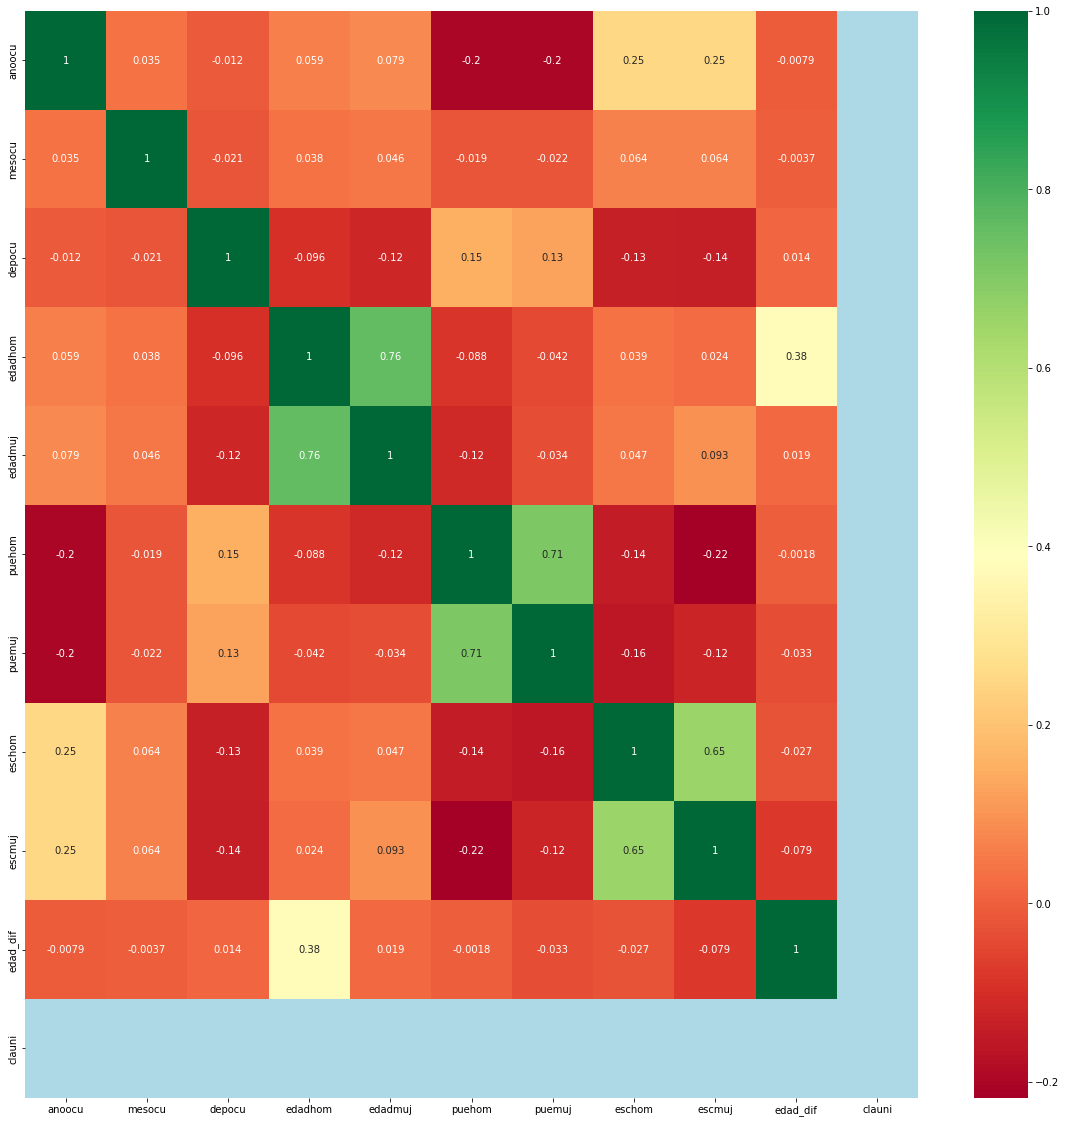

In [85]:
data_corr = matrimonios.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
cmap = plt.get_cmap('RdYlGn').copy()
cmap.set_bad('lightblue')
sns.heatmap(data_corr, xticklabels=data_corr.columns, yticklabels=data_corr.columns,annot=True, ax=ax,cmap=cmap)

## K means Edades Hombre vs Mujeres

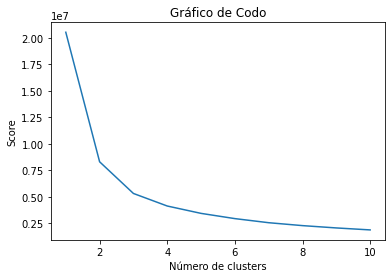

In [18]:
edades = matrimonios[["edadhom","edadmuj"]]
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(edades)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

In [19]:
kmeans = cluster.KMeans(n_clusters = 3,random_state = 20)
#X = df[['SalePrice','OverallQual','YearBuilt','GarageYrBlt','GarageCars','GrLivArea','GarageArea','YearRemodAdd']]
X = np.array(matrimonios[["edadhom","edadmuj"]])
X = sklearn.preprocessing.scale(X)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=20)

In [20]:
centroides = kmeans.cluster_centers_
y_kmeans = kmeans.predict(X)

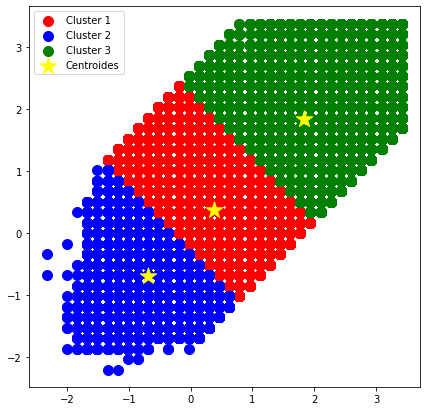

In [21]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.legend()

## K means Pueblo Hombre vs Mujeres

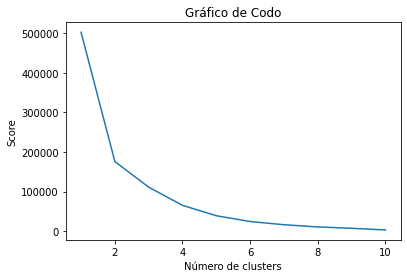

In [22]:
pueblos = matrimonios[["puehom","puemuj"]]
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(pueblos)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

In [23]:
kmeans1 = cluster.KMeans(n_clusters = 3,random_state = 20)
#X = df[['SalePrice','OverallQual','YearBuilt','GarageYrBlt','GarageCars','GrLivArea','GarageArea','YearRemodAdd']]
X = np.array(matrimonios[["puehom","puemuj"]])
X = sklearn.preprocessing.scale(X)
kmeans1.fit(X)

KMeans(n_clusters=3, random_state=20)

In [24]:
centroides1 = kmeans1.cluster_centers_
y_kmeans1 = kmeans1.predict(X)

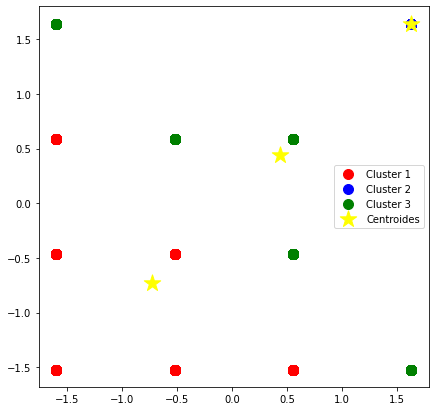

In [25]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.scatter(X[y_kmeans1 == 0, 0], X[y_kmeans1 == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[y_kmeans1 == 1, 0], X[y_kmeans1 == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[y_kmeans1 == 2, 0], X[y_kmeans1 == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(kmeans1.cluster_centers_[:,0],kmeans1.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.legend()

## K means Escolaridad Hombre vs Mujeres

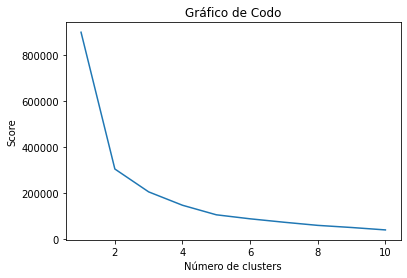

In [26]:
esco = matrimonios[["eschom","escmuj"]]
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(esco)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

In [27]:
kmeans2 = cluster.KMeans(n_clusters = 3,random_state = 20)
#X = df[['SalePrice','OverallQual','YearBuilt','GarageYrBlt','GarageCars','GrLivArea','GarageArea','YearRemodAdd']]
X = np.array(matrimonios[["eschom","escmuj"]])
X = sklearn.preprocessing.scale(X)
kmeans2.fit(X)

KMeans(n_clusters=3, random_state=20)

In [28]:
centroides2 = kmeans2.cluster_centers_
y_kmeans2 = kmeans2.predict(X)

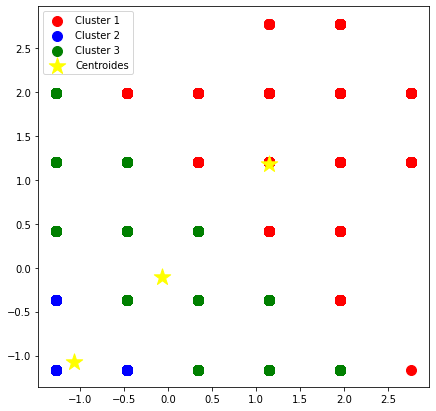

In [29]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.scatter(X[y_kmeans2 == 0, 0], X[y_kmeans2 == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[y_kmeans2 == 1, 0], X[y_kmeans2 == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[y_kmeans2 == 2, 0], X[y_kmeans2 == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.legend()

## K means Edades Hombre y Mujeres vs Diferencia de edades

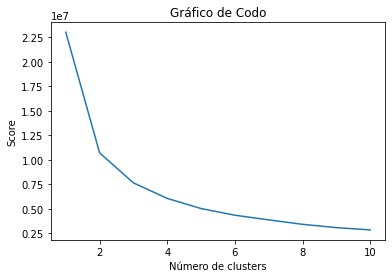

In [30]:
dif = matrimonios[["edadhom","edadmuj","edad_dif"]]
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(dif)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

In [31]:
kmeans3 = cluster.KMeans(n_clusters = 3,random_state = 20)
#X = df[['SalePrice','OverallQual','YearBuilt','GarageYrBlt','GarageCars','GrLivArea','GarageArea','YearRemodAdd']]
X = np.array(matrimonios[["edadhom","edadmuj","edad_dif"]])
X = sklearn.preprocessing.scale(X)
kmeans3.fit(X)

KMeans(n_clusters=3, random_state=20)

In [32]:
centroides3 = kmeans3.cluster_centers_
y_kmeans3 = kmeans3.predict(X)

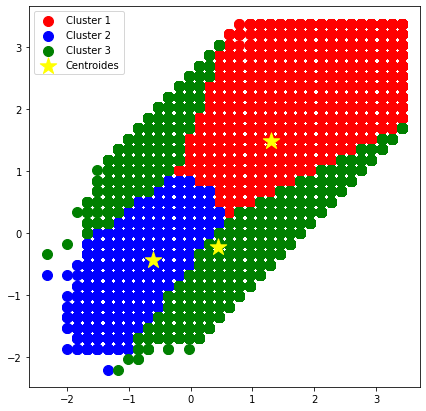

In [33]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.scatter(X[y_kmeans3 == 0, 0], X[y_kmeans3 == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[y_kmeans3 == 1, 0], X[y_kmeans3 == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[y_kmeans3 == 2, 0], X[y_kmeans3 == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(kmeans3.cluster_centers_[:,0],kmeans3.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.legend()

## K means Pueblo Hombre y Mujeres vs Departamento

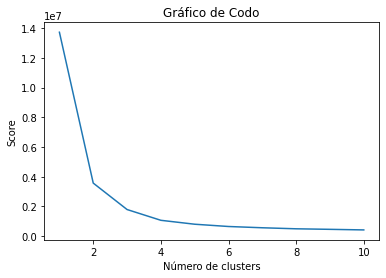

In [34]:
pueblos = matrimonios[["puehom","puemuj","depocu"]]
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(pueblos)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

In [35]:
kmeans4 = cluster.KMeans(n_clusters = 3,random_state = 20)
#X = df[['SalePrice','OverallQual','YearBuilt','GarageYrBlt','GarageCars','GrLivArea','GarageArea','YearRemodAdd']]
X = np.array(matrimonios[["puehom","puemuj","depocu"]])
X = sklearn.preprocessing.scale(X)
kmeans4.fit(X)

KMeans(n_clusters=3, random_state=20)

In [36]:
centroides4 = kmeans4.cluster_centers_
y_kmeans4 = kmeans4.predict(X)

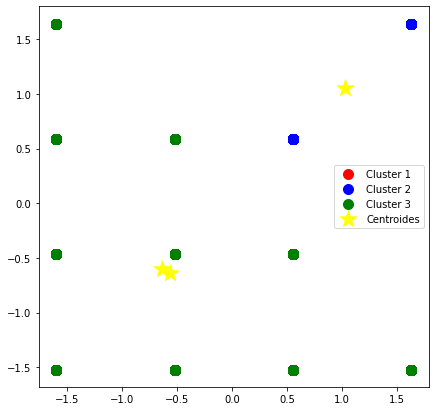

In [37]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.scatter(X[y_kmeans4 == 0, 0], X[y_kmeans4 == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[y_kmeans4 == 1, 0], X[y_kmeans4 == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[y_kmeans4 == 2, 0], X[y_kmeans4 == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(kmeans4.cluster_centers_[:,0],kmeans4.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.legend()

## K means Edad Hombre  vs Escolaridad Hombre

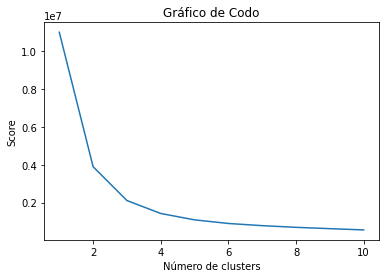

In [38]:
edad_esco_hom = matrimonios[["edadhom","eschom"]]
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(edad_esco_hom)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

In [39]:
kmeans5 = cluster.KMeans(n_clusters = 3,random_state = 20)
#X = df[['SalePrice','OverallQual','YearBuilt','GarageYrBlt','GarageCars','GrLivArea','GarageArea','YearRemodAdd']]
X = np.array(matrimonios[["edadhom","eschom"]])
X = sklearn.preprocessing.scale(X)
kmeans5.fit(X)

KMeans(n_clusters=3, random_state=20)

In [40]:
centroides5 = kmeans5.cluster_centers_
y_kmeans5 = kmeans5.predict(X)

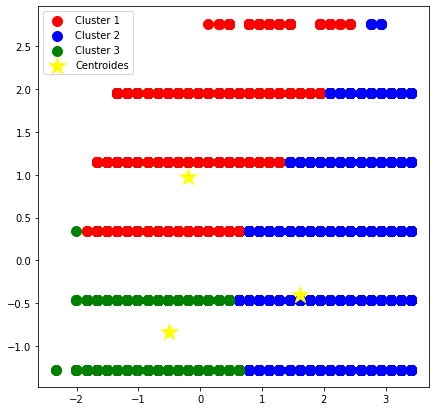

In [41]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.scatter(X[y_kmeans5 == 0, 0], X[y_kmeans5 == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[y_kmeans5 == 1, 0], X[y_kmeans5 == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[y_kmeans5 == 2, 0], X[y_kmeans5 == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(kmeans5.cluster_centers_[:,0],kmeans5.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.legend()

## K means Edad Mujeres  vs Escolaridad Mujeres

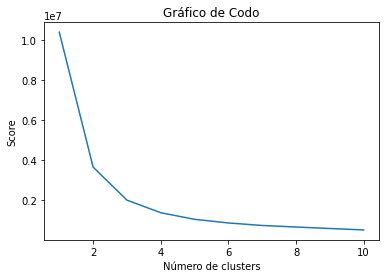

In [42]:
edad_esco_muj = matrimonios[["edadmuj","escmuj"]]
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(edad_esco_muj)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

In [43]:
kmeans6 = cluster.KMeans(n_clusters = 3,random_state = 20)
#X = df[['SalePrice','OverallQual','YearBuilt','GarageYrBlt','GarageCars','GrLivArea','GarageArea','YearRemodAdd']]
X = np.array(matrimonios[["edadmuj","escmuj"]])
X = sklearn.preprocessing.scale(X)
kmeans6.fit(X)

KMeans(n_clusters=3, random_state=20)

In [44]:
centroides6 = kmeans6.cluster_centers_
y_kmeans6 = kmeans6.predict(X)

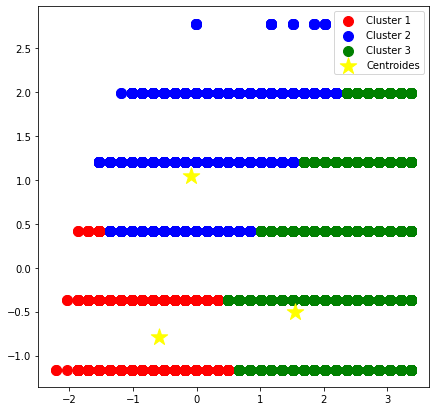

In [45]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.scatter(X[y_kmeans6 == 0, 0], X[y_kmeans6 == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[y_kmeans6 == 1, 0], X[y_kmeans6 == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[y_kmeans6 == 2, 0], X[y_kmeans6 == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(kmeans6.cluster_centers_[:,0],kmeans6.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.legend()

## K means Edad Mujeres y Hombres  vs Escolaridad Mujeres y Hombres

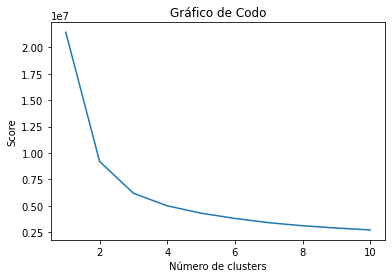

In [46]:
edad_esco_ambos = matrimonios[["edadmuj","escmuj","edadhom","eschom"]]
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(edad_esco_ambos)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

In [47]:
kmeans7 = cluster.KMeans(n_clusters = 3,random_state = 20)
#X = df[['SalePrice','OverallQual','YearBuilt','GarageYrBlt','GarageCars','GrLivArea','GarageArea','YearRemodAdd']]
X = np.array(matrimonios[["edadmuj","escmuj","edadhom","eschom"]])
X = sklearn.preprocessing.scale(X)
kmeans7.fit(X)

KMeans(n_clusters=3, random_state=20)

In [48]:
centroides7 = kmeans7.cluster_centers_
y_kmeans7 = kmeans7.predict(X)

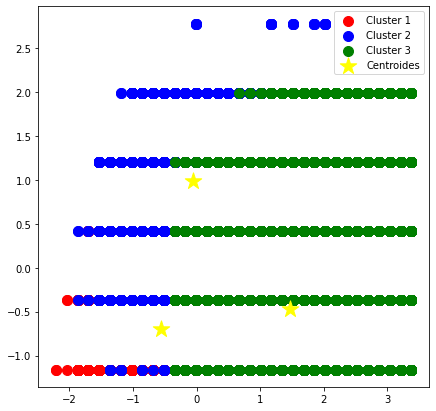

In [49]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.scatter(X[y_kmeans7 == 0, 0], X[y_kmeans7 == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[y_kmeans7 == 1, 0], X[y_kmeans7 == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[y_kmeans7 == 2, 0], X[y_kmeans7 == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(kmeans7.cluster_centers_[:,0],kmeans7.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.legend()

# cluster de todas las variables

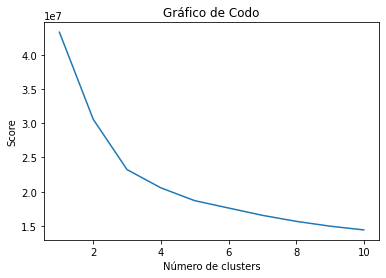

In [50]:
mat_cluster = matrimonios
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(mat_cluster)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

In [51]:
kmeans8 = cluster.KMeans(n_clusters = 3, random_state = 20)
#X = df[['SalePrice','OverallQual','YearBuilt','GarageYrBlt','GarageCars','GrLivArea','GarageArea','YearRemodAdd']]
X = np.array(matrimonios)
X = sklearn.preprocessing.scale(X)
kmeans8.fit(X)

KMeans(n_clusters=3, random_state=20)

In [52]:
centroides8 = kmeans8.cluster_centers_
y_kmeans8 = kmeans8.predict(X)

C:\Users\melma\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


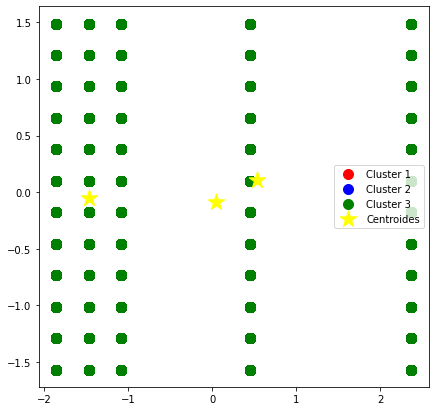

In [53]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.scatter(X[y_kmeans8 == 0, 0], X[y_kmeans8 == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[y_kmeans8 == 1, 0], X[y_kmeans8 == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[y_kmeans8 == 2, 0], X[y_kmeans8 == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(kmeans8.cluster_centers_[:,0],kmeans8.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.legend()

###### Creacion de nuevo df para almacenar el label del k measn

In [54]:
mat_allCluster = matrimonios.copy()

In [55]:
mat_allCluster['K_Labels'] = kmeans8.labels_

In [56]:
mat_allCluster['K_Labels'].value_counts()

2    120041
1    118854
0     46177
Name: K_Labels, dtype: int64

In [57]:
mat_allCluster[["edadhom","edadmuj","eschom","escmuj","puehom","puemuj","K_Labels"]].head()

,edadhom,edadmuj,eschom,escmuj,puehom,puemuj,K_Labels
0,16.0,14.0,0.0,0.0,3,3,0
1,16.0,14.0,0.0,0.0,0,0,2
5,16.0,14.0,0.0,0.0,0,0,2
6,16.0,14.0,0.0,0.0,3,3,0
7,16.0,14.0,0.0,0.0,3,3,0


# ---------------------------------------------------------------------------------------------------------------

### División train y test

In [58]:
Y = mat_allCluster.pop('K_Labels')
X = mat_allCluster

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42 )

### Modelo Naive Bayes

In [60]:
#importart y crear el modelo
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()

In [61]:
#fit model
bayes.fit(X_train, Y_train)

GaussianNB()

In [62]:
y_predict = bayes.predict(X_test)

In [63]:
print("Mean Squared Error: %f"%mean_squared_error(Y_test, y_predict))
print("R squared: %.2f"%r2_score(Y_test, y_predict))
print('Score: %.2f'%bayes.score(X_test,Y_test))

Mean Squared Error: 0.054267
R squared: 0.89
Score: 0.95


In [64]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (X_test.shape[0], (Y_test != y_predict).sum()))

Number of mislabeled points out of a total 85522 points : 4572


### Matriz de Confusion

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
matris_conf = confusion_matrix(y_true=Y_test, y_pred=y_predict)

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay

<Figure size 720x360 with 0 Axes>

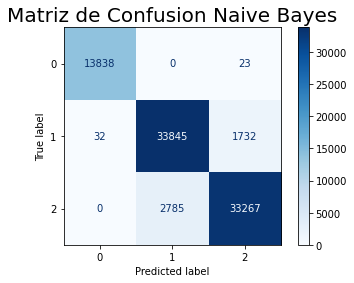

In [68]:
plt.figure(figsize=(10,5))
confusionMatrixDisplay = ConfusionMatrixDisplay(
    confusion_matrix=matris_conf,
    display_labels=bayes.classes_
)
confusionMatrixDisplay.plot(cmap='Blues')
plt.title('Matriz de Confusion Naive Bayes',size=20)
plt.grid(False)

###  Verificar graficamente si existe overfitting

In [69]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

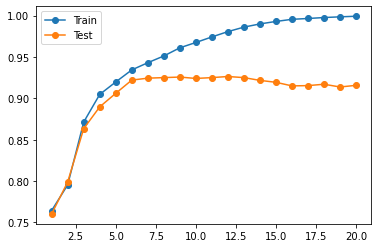

In [70]:
x, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
x_train, x_test,y_train, y_test = train_test_split(x, y,test_size=0.3,train_size=0.7)
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]
for i in values:
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(x_train, y_train)
    train_yhat = model.predict(x_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    test_yhat = model.predict(x_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

Podemos observar que no hay un overfitting marcado, se presenta  un punto medio en el aprendizaje de nuestro modelo en el que no estemos incurriendo en underfitting y tampoco en overfitting especificamente en el train, en el test muestra un poco de underfitting.

### Cross Validation

In [71]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, KFold

In [72]:
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, Y, cv=5)

In [73]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.99 accuracy with a standard deviation of 0.01


In [74]:
#Usando KFolds
kf = KFold(n_splits=10)
scores = cross_val_score(bayes, X_train, Y_train, cv=kf, scoring="accuracy")
print("Metricas de la validacion cruzada:", scores)
print("Resultado de la validacion cruzada (Media por Kfolds):", scores.mean())

Metricas de la validacion cruzada: [0.94552744 0.95063894 0.95063894 0.94688048 0.94693059 0.94988725
 0.94567777 0.94562766 0.94602856 0.9465798 ]
Resultado de la validacion cruzada (Media por Kfolds): 0.9474417439238285


Podemos verificar que realizando la validacion cruzada con svm y usandos Kfolds, la misma esta muy cercana ya que se obtuvo 0.8 y 0.83 aproximadamente.

Esta validación cruzada es un procedimiento utilizado para evitar el sobreajuste y estimar la habilidad del modelo en nuevos datos.

# pruebas de R2

In [75]:
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [76]:
regr = MLPRegressor(random_state=1, max_iter=1000, solver= 'adam', activation= 'relu')
regr.fit(X_train, Y_train)
ypredic = regr.predict(X_test)
#regr.score(X_test, Y_test)
#ypredic

In [77]:
r2_score(Y_test, ypredic)

0.07804662613947

In [78]:
regr = MLPRegressor(random_state=1, max_iter=1000, solver= 'lbfgs', activation= 'tanh')
regr.fit(X_train, Y_train)
ypredic = regr.predict(X_test)
#regr.score(X_test, Y_test)
#ypredic

In [79]:
r2_score(Y_test, ypredic)

-5.224560781780241e-07

In [80]:
regr = MLPRegressor(random_state=1, max_iter=1000, solver= 'lbfgs', activation= 'relu')
regr.fit(X_train, Y_train)
ypredic = regr.predict(X_test)
#regr.score(X_test, Y_test)
#ypredic

In [81]:
r2_score(Y_test, ypredic)

0.5039285771002457

###### con los resultados obtenidos, podemos determinar que los datos estan cerca de la línea de regresión ajustada.  La línea de regresión ajustada en una gráfica representa la ecuación de regresión matemática de nuestros datos.


###### notas: Una línea de regresión ajustada en una gráfica representa la ecuación de regresión matemática de sus datos.

## verificar presicion con DecisionTreeClassifier

In [82]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [83]:
arbol = DecisionTreeClassifier(max_depth=4, random_state=60) 
arbol = arbol.fit(X_train, Y_train)

In [84]:
#predecir y_test con el modelo creado
y_pred_arbol = arbol.predict(X_test)
print ("Accuracy:",metrics.accuracy_score(Y_test, y_pred_arbol))
print ("Precision:", metrics.precision_score(Y_test,y_pred_arbol,average='weighted') )
print ("Recall: ", metrics.recall_score(Y_test,y_pred_arbol,average='weighted'))

Accuracy: 0.9662426042421833
Precision: 0.9665611178971789
Recall:  0.9662426042421833


In [85]:
print("Mean Squared Error: %f"%mean_squared_error(Y_test, y_pred_arbol))
print("R squared: %.2f"%r2_score(Y_test, y_pred_arbol))

Mean Squared Error: 0.034564
R squared: 0.93


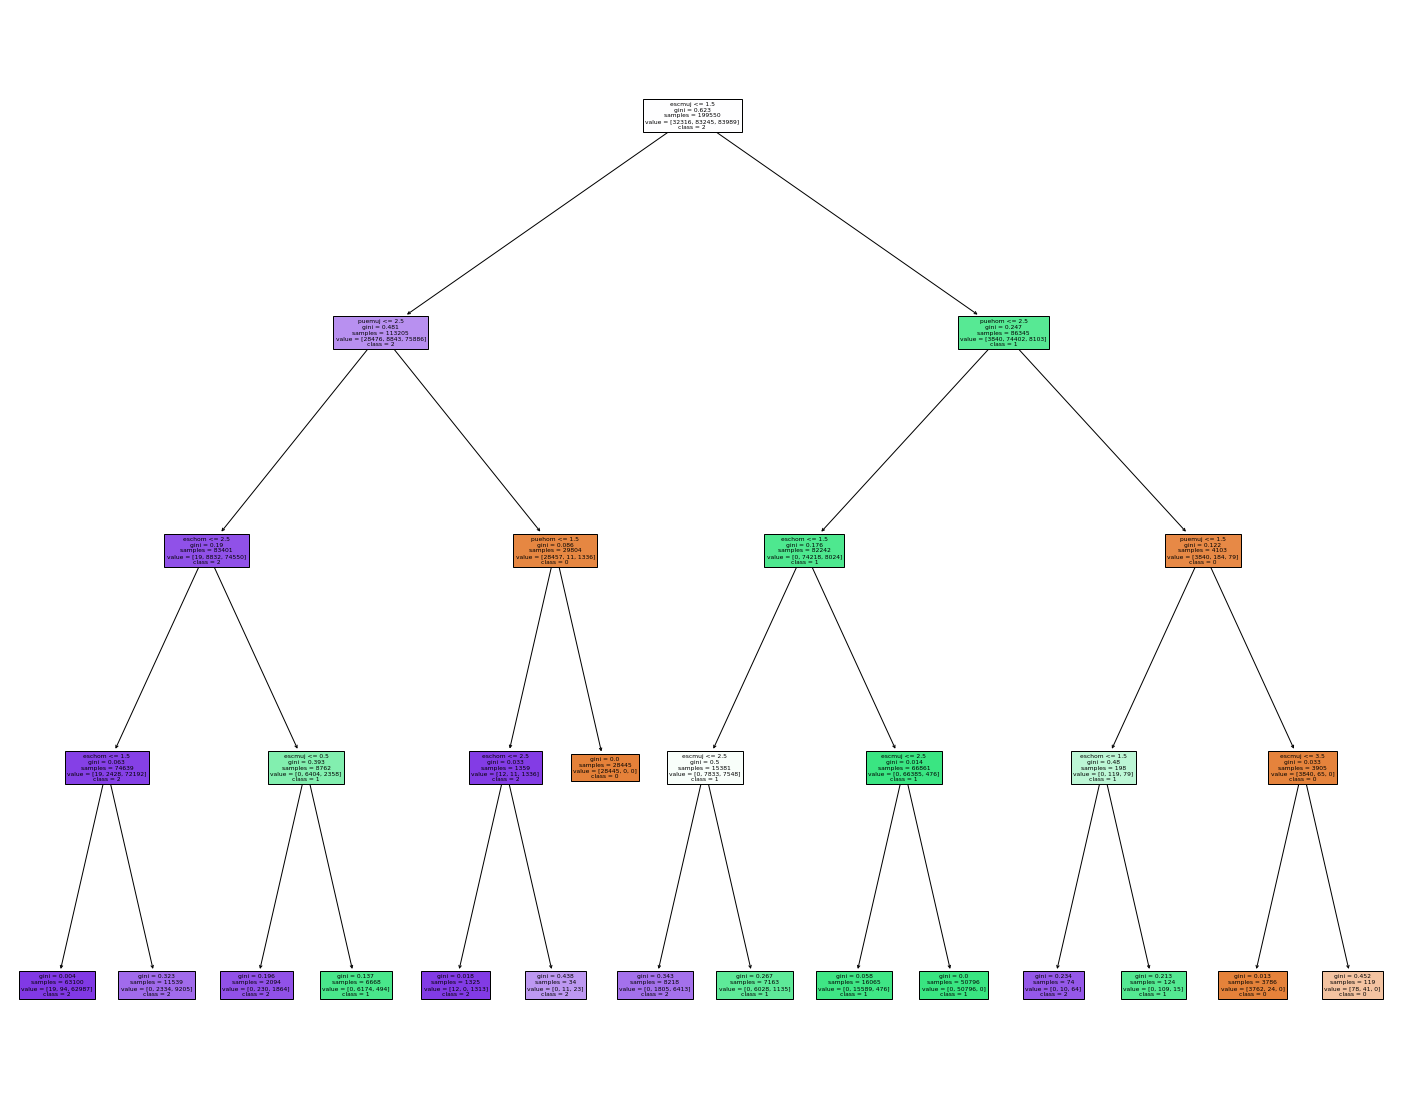

In [86]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(arbol,feature_names=mat_allCluster.columns,
               class_names=['0','1','2'],filled=True )
#save tree as png
fig.savefig('Arbol.png')

## Dataframes por cada tipo de matrimonio

In [74]:
print(matrimonios.clauni.value_counts())

0    734774
1     62104
2     49605
3     44619
4     16680
Name: clauni, dtype: int64


In [ ]:
matrimonios["clauni"]= matrimonios["clauni"].replace(
    ['Comunidad de gananciales', 'Matrimonio', 'Comunidad Absoluta', 'No especificado', 'Separación absoluta'],
                                                     [0,1,2,3,4],regex=True)

### Comunidad Gananciales

In [32]:
MatGan = matrimonios[matrimonios.clauni == 0]

<AxesSubplot:>

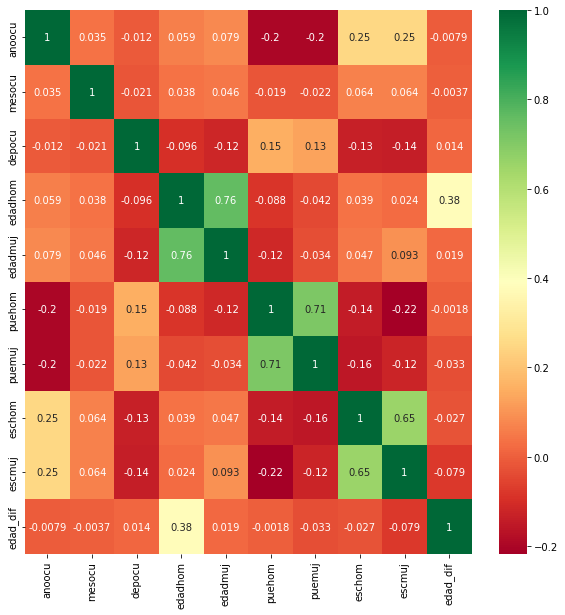

In [39]:
data_corr = MatGan.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
cmap = plt.get_cmap('RdYlGn').copy()
cmap.set_bad('lightblue')
sns.heatmap(data_corr, xticklabels=data_corr.columns, yticklabels=data_corr.columns,annot=True, ax=ax,cmap=cmap)

### Matrimonio

In [33]:
Mat = matrimonios[matrimonios.clauni == 1]

### Comunidad Absoluta

In [34]:
MatAbs = matrimonios[matrimonios.clauni == 2]

### No especificado

In [35]:
MatNE = matrimonios[matrimonios.clauni == 3]

### Separacion Absoluta

In [36]:
MatSA = matrimonios[matrimonios.clauni == 4]

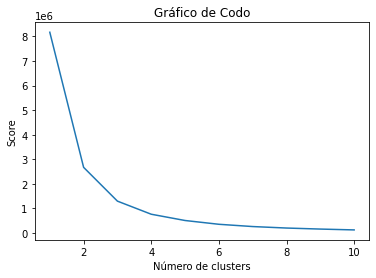

In [87]:
cla_eh = matrimonios[["edadhom","clauni"]]
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(cla_eh)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

In [88]:
kmeans_clauni_1 = cluster.KMeans(n_clusters = 3,random_state = 20)
#X = df[['SalePrice','OverallQual','YearBuilt','GarageYrBlt','GarageCars','GrLivArea','GarageArea','YearRemodAdd']]
X = np.array(matrimonios[["edadhom","clauni"]])
X = sklearn.preprocessing.scale(X)
kmeans_clauni_1.fit(X)

KMeans(n_clusters=3, random_state=20)

In [89]:
centroides = kmeans_clauni_1.cluster_centers_
y_kmeans = kmeans_clauni_1.predict(X)

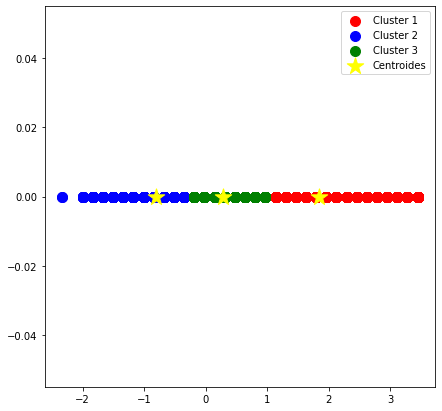

In [90]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(kmeans_clauni_1.cluster_centers_[:,0],kmeans_clauni_1.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.legend()

In [96]:
kmeans_clauni_3 = cluster.KMeans(n_clusters = 3,random_state = 20)
#X = df[['SalePrice','OverallQual','YearBuilt','GarageYrBlt','GarageCars','GrLivArea','GarageArea','YearRemodAdd']]
X = np.array(matrimonios[["edadhom","clauni", "edadmuj"]])
X = sklearn.preprocessing.scale(X)
kmeans_clauni_3.fit(X)

KMeans(n_clusters=3, random_state=20)

In [97]:
centroides = kmeans_clauni_3.cluster_centers_
y_kmeans = kmeans_clauni_3.predict(X)

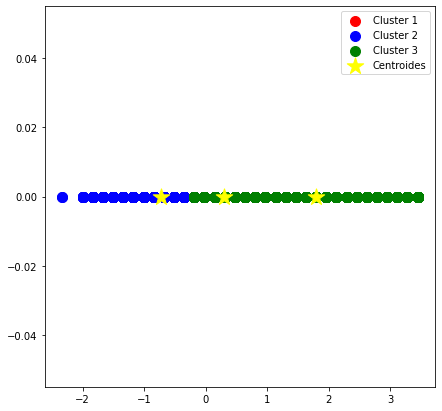

In [98]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(kmeans_clauni_3.cluster_centers_[:,0],kmeans_clauni_3.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.legend()

In [99]:
kmeans_clauni_4 = cluster.KMeans(n_clusters = 3,random_state = 20)
#X = df[['SalePrice','OverallQual','YearBuilt','GarageYrBlt','GarageCars','GrLivArea','GarageArea','YearRemodAdd']]
X = np.array(matrimonios[["edad_dif","clauni"]])
X = sklearn.preprocessing.scale(X)
kmeans_clauni_4.fit(X)

KMeans(n_clusters=3, random_state=20)

In [100]:
centroides = kmeans_clauni_4.cluster_centers_
y_kmeans = kmeans_clauni_4.predict(X)

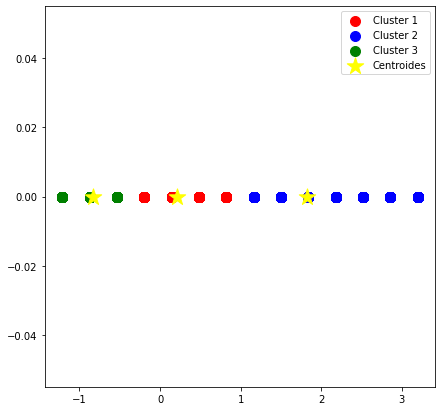

In [101]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(kmeans_clauni_4.cluster_centers_[:,0],kmeans_clauni_4.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.legend()

In [ ]:
print(matrimonios.nunumu.value_counts())